# **Prediction using Supervised ML**
## **Task 1: Simple Linear Regression**

### ***By Khushboo Agrawal***


In [14]:
# Importing all libraries required in this notebookdf
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import linear_model
%matplotlib inline

In [15]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plotting the given data on 2-D graph

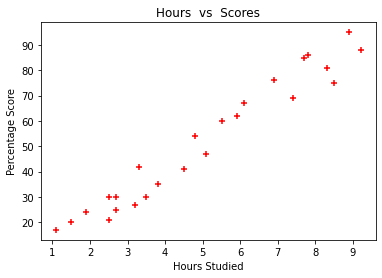

In [22]:
# Plotting the distribution of scores 
plt.title('Hours  vs  Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.scatter(df.Hours, df.Scores, color = 'red', marker = "+")

**From the above graph, we can see a linear relation between hours and scores. Hence lets apply simple linear regression on it.**

## Data Preprocessing

In [26]:
#here x denotes 'input' and y denotes 'output'
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [28]:
#splitting the data into traning and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    random_state = 0) 

# **Training the model**

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


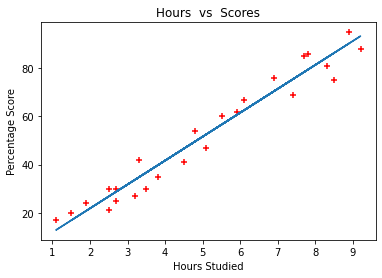

In [35]:
# Plotting the regression line
#y = m * x + c
line = regressor.coef_* x + regressor.intercept_

# Plotting for the test data
plt.title('Hours  vs  Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.scatter(x, y,color = 'red', marker = "+")
plt.plot(x , line);

## Testing the model

In [52]:
print(y_test,"\n")
#testing data on hours(input)
print(X_test)

[20 27 69 30 62 35 24] 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Predicting the results
here we are predicting for a testing model whose reults are predetermined

In [45]:
# Predicting the scores
y_pred = regressor.predict(X_test) 
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [60]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Testing the accuracy of the model 

In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486


In [80]:
#The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 20.33


## Building our own model 

In [79]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
pred = regressor.predict([[hours]])
print(pred)

[93.89272889]
